<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>


## **<center>Linear Regression - Assignment (Solution)</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Extraction**](#Section71)<br>
  - **7.2** [**Feature Transformation**](#Section72)<br>
  - **7.3** [**Feature Scaling**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- **Linear Regression** is a machine learning algorithm based on supervised learning.

- It is mostly used for finding out the **relationship** between **features** and **forecasting (or target) variable**.

- This regression technique finds out a **linear relationship** between x (input) and y (output). Hence, the name is Linear Regression.

<center><img src="https://dphi.tech/blog/wp-content/uploads/2020/04/example-regression-simulation.gif" width=50%></center>


- Linear regression can be denoted by the equation: 
<center><h4>$y$= $b0$ + $b1$ * $X$</h4></center>

- So if **salary** is a **linearly dependent** on number of **years of experience**, we can **predict someone's salary** using the equation:

<center><h4>$salary$= $b0$ + $b1$ * $years\_of\_experience$</h4></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- A famous car dealer - **LinReg Cars** has recently seen some **decline** in their car **sales**.

- They need to find the causes of the decline and want to estimate the future sales volume for their dealership.

- They have hired you - a **data scientist** to **analyze** their previous **sales volume data**.

- Your objective is to **find** which **features** have more **impact** on **car sales** and provide information on it.

- Additionally, you have to **train** a **regression** model to **predict** car **sales** and **check the accuracy** of your **model's predictions**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [40]:
# !pip install -q datascience                                                       # Package that is required by pandas profiling
# !pip install -q pandas-profiling  

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.



In [41]:
# !pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [42]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.                             
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set is being taken from the **Analytixlabs** for the purpose of **prediction**.


</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 156 | 16 | 16.0 KB | 

</br>
													

|Id|Feature|Description|
|:--|:--|:--|
|01|**Manufacturer**| Manufacturer Name |
|02|**Model**| Model name of the car |
|03|**Sales_in_thousands**| Number of sales per thousand |
|04|**_year_resale_value**| Resale value |
|05|**Vehicle_type**| Type of vehicle - Passenger or Car |
|06|**Price_in_thousands**| Price of vehicle in thousands of dollars |
|07|**Engine_size**| Volume of the cylinder |
|08|**Horsepower**| Horsepower refers to the power an engine produces |
|09|**Wheelbase**| The distance between the end axles of a vehicle|
|10|**Width**| Width of the vehicle |
|11|**Length**| Length of the vehicle |
|12|**Curb_weight**| Weight of the vehicle without any passenger |
|13|**Fuel_capacity**| Fuel tank capacity |
|14|**Fuel_efficiency**| Fuel efficiency (gallon / miles) |
|15|**Latest_Launch**| Date of launch of latest model version |
|16|**Power_perf_factor**| Power Performance Factor |

**NOTE**: You can use this **[link](https://docs.google.com/document/d/1Cz6X7CRN-7EBNlt7wrMVqMsVpenLfu4r2UG-JE01jJs/edit?usp=sharing)** as a reference for feature description


In [43]:
car = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
print('Data Shape:', car.shape)
car.head()

Data Shape: (156, 16)


,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.91900,16.36000,Passenger,21.50000,1.80000,140,101.20000,67.30000,172.40000,2.63900,13.20000,28,2/2/2012,58.28015
1,Acura,TL,39.38400,19.87500,Passenger,28.40000,3.20000,225,108.10000,70.30000,192.90000,3.51700,17.20000,25,6/3/2011,91.37078
2,Acura,CL,14.11400,18.22500,Passenger,29.00000,3.20000,225,106.90000,70.60000,192.00000,3.47000,17.20000,26,1/4/2012,90.34500
3,Acura,RL,8.58800,29.72500,Passenger,42.00000,3.50000,210,114.60000,71.40000,196.60000,3.85000,18.00000,22,3/10/2011,91.38978
4,Audi,A4,20.39700,22.25500,Passenger,23.99000,1.80000,150,102.60000,68.20000,178.00000,2.99800,16.40000,27,10/8/2011,62.77764


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [44]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.00000,156.00000,156.00000,156.00000,156.00000,156.00000,156.00000,156.00000,156.00000,156.00000,156.00000,156.00000
mean,52.05174,18.06357,27.40107,3.06090,185.94872,107.48718,71.15000,187.34359,3.38046,17.95192,23.83333,77.12886
std,68.90712,10.07694,14.30586,1.04465,56.70032,7.64130,3.45187,13.43175,0.62920,3.88792,4.25605,25.08404
min,0.11000,5.16000,9.23500,1.00000,55.00000,92.60000,62.60000,149.40000,1.89500,10.30000,15.00000,23.27627
25%,13.63000,12.52750,18.08125,2.30000,149.50000,103.00000,68.40000,177.57500,2.97300,15.80000,21.00000,60.56758
50%,27.60900,17.61750,23.09950,3.00000,177.50000,107.00000,70.55000,187.90000,3.35500,17.20000,24.00000,72.16064
75%,65.90550,18.08973,31.93875,3.57500,215.00000,112.20000,73.42500,196.12500,3.78875,19.57500,26.00000,89.62379
max,540.56100,67.55000,85.50000,8.00000,450.00000,138.70000,79.90000,224.50000,5.57200,32.00000,45.00000,188.14432


**Observations**:

- **Sales volume** for some models can range from as **low** as a **few hundred units** to as **high** as **540 thousand units**.

- **25% of car models** have around **66k units**.

- **50% of car models** have their sales **more than 27k units**.

- **75% of car models** have their sales **less than 14k units**.

- The bare **minimum price** for a car is found to be **\$9235.0** whereas some models can have their prices go upto **\$85500.0**.

- **More than 50%** of the car models have their **price lower than the average** price i.e. **\$27401**.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [45]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        156 non-null    object 
 1   Model               156 non-null    object 
 2   Sales_in_thousands  151 non-null    float64
 3   _year_resale_value  156 non-null    float64
 4   Vehicle_type        156 non-null    object 
 5   Price_in_thousands  156 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    int64  
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         156 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     156 non-null    int64  
 14  Latest_Launch       156 non-null    object 
 15  Power_perf_factor   156 non-null    float64
dtypes: float

**Observations**:

- Out of 16 features, we have **2 int64 datatype** features(Fuel_efficiency and Horsepower), **4 object type** features (Manufacturere, Model, Vehicle_type, and Latest_Launch), and the **rest are of float64** datatype features.

- We may have to **convert some variables** like Vehicle_type into appropriate forms so we can use them for training purposes.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [46]:
# profile = ProfileReport(df=car)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations**:

- The report shows 16 features with 156 observations.

- There are 4 categorical and 12 numeric features.

- Model and Latest launch are **uniform** and have a **high cardinality**.

- Sales_in_thousands has a high correlation with price_in_thousands, wheelbase and length features.

- 5 cells (0.2%) have misiing information. All of them are from our target variable - Sales_in_thousands.

- We will have to **deal with missing values** present in the dataset.

#### **Performing Operations**


---
**<h4>Question 1:** Create a function that imputes the missing value using groupby Manufacturer and replacing with "median" values.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `.groupby("Manufacturer")` to create manufacturer groups.

- Use `.transform()` method on 'Sales_in_thousands' feature to replace the missing values with median.

</details>

In [47]:
def impute_missing(data=None):

    car["Sales_in_thousands"].fillna(value=car.groupby("Manufacturer")["Sales_in_thousands"].transform(func="median"), inplace=True)
    return car.isna().sum()

In [48]:
print(car.shape)
impute_missing(data=car)
print(car.shape)

(156, 16)
(156, 16)



---
**<h4>Question 2:** Create a function that performs dummification of 'Vehicle_type' feature and replaces the original feature with its dummy features. </h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `.get_dummies` to dummify 'Vehicle_type' feature.

- Keep `drop_first=True` parameter.

</details>

In [49]:
def dummy_car_creator(data=None):
  # Create a dummy variable for vehicle_type
  dummies = pd.get_dummies(data=data, columns=['Vehicle_type'], drop_first=True)

  # Return the dummy variable
  return dummies

In [50]:
car_dummy_v = dummy_car_creator(data=car)
car_dummy_v.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Passenger
0,Acura,Integra,16.91900,16.36000,21.50000,1.80000,140,101.20000,67.30000,172.40000,2.63900,13.20000,28,2/2/2012,58.28015,1
1,Acura,TL,39.38400,19.87500,28.40000,3.20000,225,108.10000,70.30000,192.90000,3.51700,17.20000,25,6/3/2011,91.37078,1
2,Acura,CL,14.11400,18.22500,29.00000,3.20000,225,106.90000,70.60000,192.00000,3.47000,17.20000,26,1/4/2012,90.34500,1
3,Acura,RL,8.58800,29.72500,42.00000,3.50000,210,114.60000,71.40000,196.60000,3.85000,18.00000,22,3/10/2011,91.38978,1
4,Audi,A4,20.39700,22.25500,23.99000,1.80000,150,102.60000,68.20000,178.00000,2.99800,16.40000,27,10/8/2011,62.77764,1


---
**<h4>Question 3:** Create a function that drops the below mentioned variables which will not help in prediction of sales or have high correlation with other features.</h4>

---

``` ['Manufacturer', 'Model', 'Latest_Launch','Power_perf_factor'] ```


<details>

**<summary>Hint:</summary>**

- You can use `.drop` to drop the given features with axis=1.

</details>

In [51]:
def drop_vars(data=None):
  # Drop the mentioned columns
  car_drop = data.drop(data[['Manufacturer', 'Model', 'Latest_Launch']], axis=1)

  # Return the modified dataframe
  return car_drop

In [52]:
car_dummy = drop_vars(data=car_dummy_v)
car_dummy.head()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.91900,16.36000,21.50000,1.80000,140,101.20000,67.30000,172.40000,2.63900,13.20000,28,58.28015,1
1,39.38400,19.87500,28.40000,3.20000,225,108.10000,70.30000,192.90000,3.51700,17.20000,25,91.37078,1
2,14.11400,18.22500,29.00000,3.20000,225,106.90000,70.60000,192.00000,3.47000,17.20000,26,90.34500,1
3,8.58800,29.72500,42.00000,3.50000,210,114.60000,71.40000,196.60000,3.85000,18.00000,22,91.38978,1
4,20.39700,22.25500,23.99000,1.80000,150,102.60000,68.20000,178.00000,2.99800,16.40000,27,62.77764,1



---
**<h4>Question 4:** Create a function to calculates the inter quantile range and then drops off the values outside 5th to 95th quantile values.</h4>

---

<details>

**<summary>Hint:</summary>**

- Calculate Q1 and Q3 using `.quantile` method of a dataframe.

- Calculate the IQR using Q1 and Q3.

- Remove the rows which have values **<Q1-1.5*0IQR** or **>Q3+1.5*IQR** in their respective columns.

</details>

In [53]:
def iqr_checker(data=None):
  # Calculate Q1 and Q3 as 5th and 95th percentile
  Q1 = data.quantile(0.05)
  Q3 = data.quantile(0.95)

  # Calculate the IQR
  IQR = Q3 - Q1

  # Filter out the values outside of the IQR
  car_out = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

  # Return the reduced dataframe
  return car_out

In [54]:
car_dummy = iqr_checker(data=car_dummy)
car_dummy.head()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.91900,16.36000,21.50000,1.80000,140,101.20000,67.30000,172.40000,2.63900,13.20000,28,58.28015,1
1,39.38400,19.87500,28.40000,3.20000,225,108.10000,70.30000,192.90000,3.51700,17.20000,25,91.37078,1
2,14.11400,18.22500,29.00000,3.20000,225,106.90000,70.60000,192.00000,3.47000,17.20000,26,90.34500,1
3,8.58800,29.72500,42.00000,3.50000,210,114.60000,71.40000,196.60000,3.85000,18.00000,22,91.38978,1
4,20.39700,22.25500,23.99000,1.80000,150,102.60000,68.20000,178.00000,2.99800,16.40000,27,62.77764,1


In [55]:
car_dummy.head()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.91900,16.36000,21.50000,1.80000,140,101.20000,67.30000,172.40000,2.63900,13.20000,28,58.28015,1
1,39.38400,19.87500,28.40000,3.20000,225,108.10000,70.30000,192.90000,3.51700,17.20000,25,91.37078,1
2,14.11400,18.22500,29.00000,3.20000,225,106.90000,70.60000,192.00000,3.47000,17.20000,26,90.34500,1
3,8.58800,29.72500,42.00000,3.50000,210,114.60000,71.40000,196.60000,3.85000,18.00000,22,91.38978,1
4,20.39700,22.25500,23.99000,1.80000,150,102.60000,68.20000,178.00000,2.99800,16.40000,27,62.77764,1


<a name = Section52></a>
### **5.2 Post Profiling Report**

In [56]:
# profile = ProfileReport(df=car_dummy)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations**:

- After pre-processing our data, we have **154 observations** with **14 features** (**1 categorical + 13 numeric**)

- There are **no missing values** present in the dataset.

- We have our **new** binary dummy **feature** as **Vehicle_type_Passenger** with unique **values as 0 or 1**.

- There is a **high correlation** among the features. We may have to **filter out** the **necessary** features for **building** our **prediction model**.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 5:** Create a function that checks the distribution of the target feature.

---

<details>

**<summary>Hint:</summary>**

- Plot a 10x7 inches figure

- Plot a kdeplot/histplot for the `Sales_in_thousands` variable.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [57]:
def plot_target():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a kde plot on Sales_in_thousands using sns.kdeplot
  sns.kdeplot(x = (car_dummy['Sales_in_thousands']), shade=True)

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.xlabel(xlabel='Sales_in_thousands', size=14)
  plt.ylabel(ylabel='Density', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Sales in thousands', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

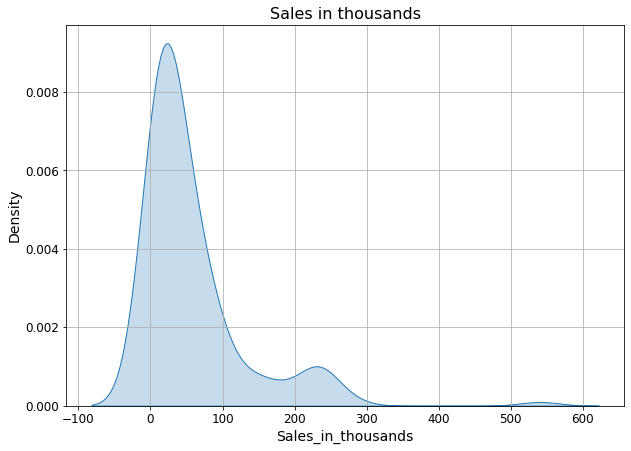

In [58]:
plot_target()

**Observations:**

- There is **skewness** in our target variable.

- We have to **transform** it so that we can use it for **model building**.


---
**<h4>Question 6:** Create a function that plots the top 10 manufacturers with  the most amount of listed cars.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use the original dataframe with imputed values.

- Plot a 10x7 inches figure

- Plot a horizontal bar plot for the `Manufacturer` variable displaying top 10 manufacturers.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [59]:
def car_count():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a horizontal bar plot for Manufacturer.
  car['Manufacturer'].value_counts().nlargest(10).plot(kind='barh', cmap='Dark2')

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.ylabel(ylabel='Manufacturer', size=14)
  plt.xlabel(xlabel='Count', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Manufacturers with highest number of cars', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

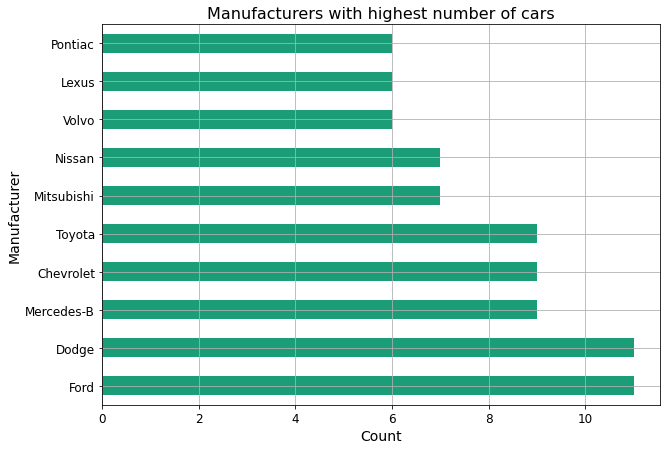

In [60]:
car_count()

**Observations:**

- **Ford** and **Dodge** have the **most** number of numbers **listed** in this dataset.


---
**<h4>Question 7:** Create a function that compares the price and engine size of listed cars.</h4>

---

<details>

**<summary>Hint:</summary>**

- Plot a 10x7 inches figure

- Plot a regression plot using `sns.regplot` between Engine_size and `Price_in_thousands` features.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [61]:
def price_v_engine():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a regression plot using sns.regplot between Engine_size and Price_in_thousands features.
  sns.regplot(data=car_dummy, x='Price_in_thousands', y='Engine_size')

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.ylabel(ylabel='Price_in_thousands', size=14)
  plt.xlabel(xlabel='Engine_size', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Price vs Engine_size', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

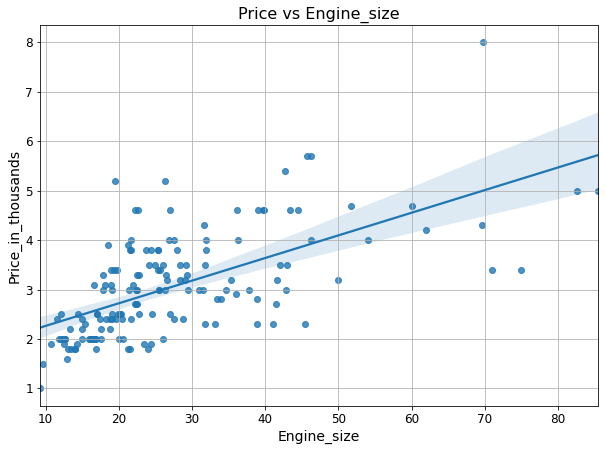

In [62]:
price_v_engine()

**Observations:**

- We can observe **high positive correlation** between the two features.


---
**<h4>Question 8:** Create a function that compares the current price and resale price of listed cars after a year.</h4>

---

<details>

**<summary>Hint:</summary>**

- Plot a 15x7 inches figure

- Plot a boxplot for `_year_resale_value` and `Price_in_thousands` features.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [63]:
def price_v_resale():
  # Plot a boxplot for _year_resale_value and Price_in_thousands features.
  car_dummy[['Price_in_thousands', '_year_resale_value']].plot(kind='box', figsize=(15, 7), vert=False)

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.ylabel(ylabel='Features', size=14)
  plt.xlabel(xlabel='Price of car (in thousand dollars)', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Price and Resale Value', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

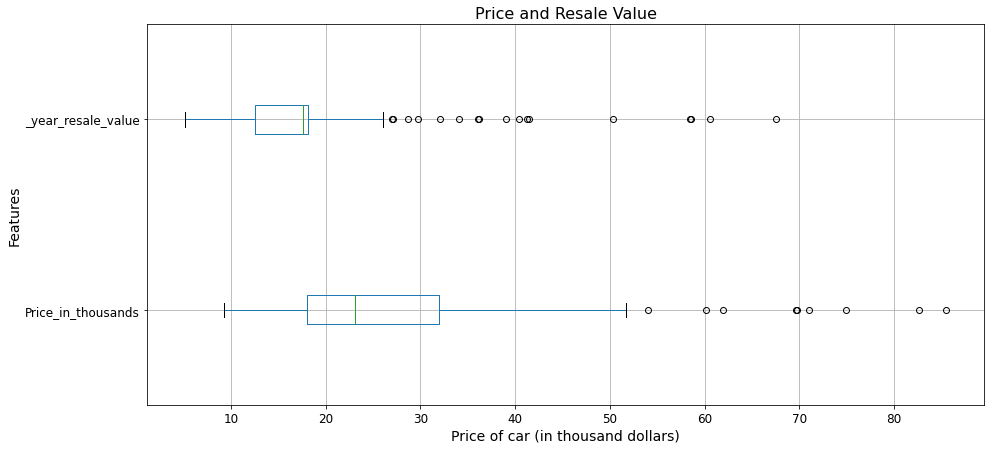

In [64]:
price_v_resale()

**Observations:**

- We can see that there are **many outliers** still left in both the features.

- Since we have less number of rows, we will **apply** some **transformations** on these features so we can use them.

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Extraction**

- In this section, we will select some of the features that will be used for model development.


---
**<h4>Question 9:** Create a function that selects the following columns for the model development phase.

- Features: `['Engine_size', 'Fuel_efficiency', '_year_resale_value', 'Sales_in_thousands', 'Price_in_thousands', 'Horsepower', 'Length']`</h4>

---

<details>

**<summary>Hint:</summary>**

- Simply select the features given and return them in a new dataframe.

</details>

In [65]:
def feature_extract(data=None):
  df = data[['Engine_size', 'Fuel_efficiency', '_year_resale_value', 'Sales_in_thousands', 'Price_in_thousands', 'Horsepower', 'Length']]
  return df

In [66]:
df = feature_extract(data=car_dummy)
df.head()

,Engine_size,Fuel_efficiency,_year_resale_value,Sales_in_thousands,Price_in_thousands,Horsepower,Length
0,1.80000,28,16.36000,16.91900,21.50000,140,172.40000
1,3.20000,25,19.87500,39.38400,28.40000,225,192.90000
2,3.20000,26,18.22500,14.11400,29.00000,225,192.00000
3,3.50000,22,29.72500,8.58800,42.00000,210,196.60000
4,1.80000,27,22.25500,20.39700,23.99000,150,178.00000


<a name = Section72></a>
### **7.2 Feature Transformation**

- In this section, we will apply **transformations** to some features.


---
**<h4>Question 10:** Create a function that applies log transformation on the given features.</h4>

---

- Feature: `Sales_in_thousands` - log(1+x)

- Feature: `_year_resale_value` - log(x)

- Feature: `Price_in_thousands` - log(x)


<details>

**<summary>Hint:</summary>**

- log(1+x) transformation can be applied using `np.log1p()` method.

- log(x) transformation can be applied using `np.log()` method.

</details>

In [67]:
def transform_features(df=None):
  df['Sales_in_thousands'] = np.log1p(df['Sales_in_thousands'])
  df['_year_resale_value'] = np.log(df['_year_resale_value'])
  #df['Price_in_thousands'] = np.log(df['Price_in_thousands'])
  return df

In [68]:
df = transform_features(df=df)
df.head()

,Engine_size,Fuel_efficiency,_year_resale_value,Sales_in_thousands,Price_in_thousands,Horsepower,Length
0,1.80000,28,2.79484,2.88586,21.50000,140,172.40000
1,3.20000,25,2.98946,3.69843,28.40000,225,192.90000
2,3.20000,26,2.90279,2.71562,29.00000,225,192.00000
3,3.50000,22,3.39199,2.26051,42.00000,210,196.60000
4,1.80000,27,3.10257,3.06325,23.99000,150,178.00000


<a name = Section73></a>
### **7.3 Feature Scaling**

- In this section, we will perform **standard scaling** over the selected features.


---
**<h4>Question 11:** Create a function that scales the features of dataframe using a standard scaler.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a scaler using StandardScaler()

- Fit and transform dataframe using `.fit_transform()` method of the **StandardScaler**.

- Create a new dataframe using output of scaled dataframe and column names of the input dataframe.

</details>

In [69]:
def scale_data(data=None):
  sc = StandardScaler()
  scaled_data = sc.fit_transform(data)
  scaled_dataframe = pd.DataFrame(data=scaled_data, columns=data.columns)
  return scaled_dataframe

In [70]:
scaled_data = scale_data(data=df)
scaled_data.head()

,Engine_size,Fuel_efficiency,_year_resale_value,Sales_in_thousands,Price_in_thousands,Horsepower,Length
0,-1.21089,0.98215,0.01960,-0.43854,-0.41382,-0.81299,-1.11614
1,0.13359,0.27500,0.46289,0.23123,0.07005,0.69095,0.41501
2,0.13359,0.51072,0.26549,-0.57886,0.11213,0.69095,0.34779
3,0.42169,-0.43215,1.37972,-0.95399,1.02377,0.42555,0.69136
4,-1.21089,0.74643,0.72051,-0.29233,-0.23921,-0.63605,-0.69787


---
**<h4>Question 12:** Create a function that creates two dataframes for dependent and independent features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "Sales_in_thousands" feature from axis 1.

- Create target series by using "Sales_in_thousands" as value.

</details>


In [71]:
def seperate_Xy(data=None):
  X = data.drop(labels=['Sales_in_thousands'], axis=1)
  y = data['Sales_in_thousands']
  return X, y

In [72]:
X, y = seperate_Xy(data=scaled_data)
X.head()

,Engine_size,Fuel_efficiency,_year_resale_value,Price_in_thousands,Horsepower,Length
0,-1.21089,0.98215,0.01960,-0.41382,-0.81299,-1.11614
1,0.13359,0.27500,0.46289,0.07005,0.69095,0.41501
2,0.13359,0.51072,0.26549,0.11213,0.69095,0.34779
3,0.42169,-0.43215,1.37972,1.02377,0.42555,0.69136
4,-1.21089,0.74643,0.72051,-0.23921,-0.63605,-0.69787


<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 13:** Create a function that splits the data into train and test datasets while keeping random state as 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `train_test_split()` to split the dataset.

- Use `test_size` of **0.25**

- Use `random_state` equal to **42**.

</details>

In [73]:
def Xy_splitter(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [74]:
X_train, X_test, y_train, y_test = Xy_splitter(X=X, y=y)

Training Data Shape: (117, 6) (117,)
Testing Data Shape: (39, 6) (39,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop a Linear Regression model, check it's performance using various performance metrics.

---
**<h4>Question 14:** Create a function that instantiates a Linear Regression model.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a Linear Regression model using LinearRegression().

</details>

In [75]:
def model_generator_lr():
  return LinearRegression()

In [76]:
clf = model_generator_lr()

---
**<h4>Question 15:** Create a function that fits the model on train set and evaluates it on test set using various metrics.</h4>

---

<details>

**<summary>Hint:</summary>**

- `Fit` the model on training set.
- `Predict` the values on the train set and the test set.
- Evaluate the scores using the `mean_absolute_error`, `mean_squared_error`, `root_mean_squared_error`, `r2_score`, and `adjusted_r2_score` on the train set and the test set.

</details>

In [38]:
def train_n_eval(clf=None):

  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

    # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Calculate test accuracy of the model
  clf_r2 = r2_score(y_test, y_pred)

  # Calculate train accuracy of the model
  clf_r2_train = r2_score(y_train, y_pred_train)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')
  print('[R2-Score Train]:', clf_r2_train)
  print('[R2-Score Test]:', clf_r2)

In [77]:
train_n_eval(clf=clf)

Performance Metrics for LinearRegression :
[R2-Score Train]: 0.42549016334886214
[R2-Score Test]: 0.42263525705114025
----------------------------------------



**Observations:**

- We can see that our **R-squared score** is around **0.42**.

- We have a **small dataset** so it can affect our model training as well.

- This can be improved by trying **different combination** of **features** that give the **best values** for **R-squared** and **Adjusted R-squared** scores.

**<h4>NOTE:**</h4>

- You may try different combinations of features that affect the target variable's prediction.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We have **analyzed** and understood the **different features** that can **influence** the **sales volume** of the **cars**.

- **Price**, **resale price** and **engine size** plays an important role in **determining** the **sales volume** of the cars.

- We have also built a **predictor** to **estimate** the **sales volume** based on those **influential features**.

- The model **performs decently** as shown by our **evaluation metrics**.

- This can help the **dealership** to **improve** their overall **sales**.

- Since the data is less, **getting more records** can **improve** the model's **performance**.

- We can also use other **regression** techniques and **compare** them with our trained model.